In [2]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [1]:
# exercise 01

"""
Best feature subset

How do you select the optimal subset of independent variables in a regression model?

As a reminder, filter methods rank features based on their statistical performance while wrapper, embedded and tree-based methods use a machine learning model to evaluate performance.

Select the statement that is true:
"""

# Instructions

"""
Possible Answers

    Filter methods, which use an ML model, rank features by correlation with the target variable and always provide the best subset.
    
    
    Wrapper methods use an iterative process with a machine learning algorithm to evaluate performance but do not always provide the best subset.
    
    
    Embedded methods, such as Lasso and Ridge Regression, are regularization methods that extract features that contribute the most during a given iteration and provide the best subset dependent on the penalty parameter.(Answer)
    
    
    Feature importance methods use an ML model such as SVR or LARS to provide the best subset.
"""

# solution



#----------------------------------#

# Conclusion

"""
That's right! Embedded methods perform an iterative process to carefully extract important features to come up with the best subset based on the value of the penalty parameter alpha!
"""

"\nThat's right! Embedded methods perform an iterative process to carefully extract important features to come up with the best subset based on the value of the penalty parameter alpha!\n"

In [4]:
import pandas as pd
diabetes = pd.read_csv(path_data+'diabetes.csv')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
X = diabetes.iloc[:,:-1]
y = diabetes['progression']

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

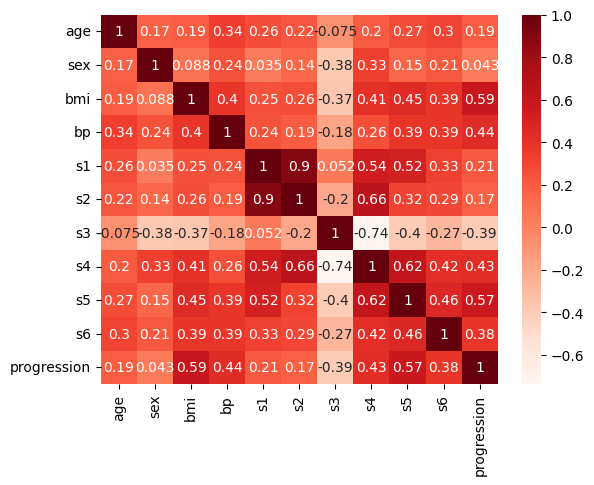

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64
[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
0.4982900996498095
0.052268622851592575


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/sklearn/linear_model/_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


"\nNice job! While filter and wrapper methods work pretty well for feature selection, tree-based selection methods can be even better. You'll try them out in the next exercise!\n"

In [7]:
# exercise 02

"""
Filter and wrapper methods

Questions about reducing the dimensionality of a dataset are highly common in machine learning interviews. One way to reduce the dimensionality of a dataset is by only selecting relevant features in your dataset.

Here you'll practice a filter method on the diabetes DataFrame followed by 2 different styles of wrapper methods that include cross-validation. You will be using pandas, matplotlib.pyplot and seaborn to visualize correlations, process your data and apply feature selection techniques to your dataset.

The feature matrix with the dropped target variable column (progression) is loaded as X, while the target variable is loaded as y.

Note that pandas, matplotlib.pyplot, and seaborn have already been imported to your workspace and aliased as pd, plt, and sns respectively.

Notice you've added a Cross-validate step to your pipeline (which applies to the last 3 steps):
"""

# Instructions

"""

    Create correlation matrix with diabetes and a heatmap, then subset the features which have greater than 50% correlation.
---
    Instantiate a linear kernel SVR estimator and a feature selector with 5 cross-validations, fit to features and target.
---
    Drop the unimportant column found in step 2 from X and instantiate a LarsCV object and fit it to your data.

"""

# solution

import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

#----------------------------------#

# Import modules
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV

# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

#----------------------------------#

# Import modules
from sklearn.linear_model import LarsCV

# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

#----------------------------------#

# Conclusion

"""
Nice job! While filter and wrapper methods work pretty well for feature selection, tree-based selection methods can be even better. You'll try them out in the next exercise!
"""

In [8]:
# exercise 03

"""
Feature selection through feature importance

In the last exercise, you practiced how filter and wrapper methods could be of use when selecting features in machine learning, and in machine learning interviews. In this exercise, you'll practice feature selection methods using the built-in feature importance in tree-based machine learning algorithms on the diabetes DataFrame.

Although there is only time and space to practice with a few of them on DataCamp, there is some excellent documentation available from the scikit-learn website that goes over several other ways to select features.
(https://scikit-learn.org/stable/modules/feature_selection.html)
The feature matrix and target array are saved to your workspace as X and y, respectively.

Recall that feature selection is considered a pre-processing step: 
"""

# Instructions

"""

    Import the correct function to instantiate a Random Forest regression model.
    Fit the model and print feature importance.
---
    Import the correct function to instantiate an Extra Tree regression model.
    Fit the model and print feature importance.

"""

# solution

# Import
from sklearn.ensemble import RandomForestRegressor

# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

#----------------------------------#

# Import
from sklearn.ensemble import ExtraTreesRegressor

# Instantiate
xt_mod = ExtraTreesRegressor()

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

#----------------------------------#

# Conclusion

"""
Amazing! Though both the Random Forest and Extra Trees ultimately methods have similar results, the output from the Random Forest are a bit more clear. Either way, one of the simplest ways to have an algorithm select features for you before training your machine learning models are tree-based methods such as these. Now let's learn the ins-and-outs of regularization methods in the next lesson...
"""

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.06057341 0.27070496 0.11944643 0.05027639 0.05410803 0.06986575
 0.07185931 0.22139236 0.08177336]


"\nAmazing! Though both the Random Forest and Extra Trees ultimately methods have similar results, the output from the Random Forest are a bit more clear. Either way, one of the simplest ways to have an algorithm select features for you before training your machine learning models are tree-based methods such as these. Now let's learn the ins-and-outs of regularization methods in the next lesson...\n"

In [9]:
# exercise 04

"""
Avoiding overfitting

What techniques can be used to ensure you're not overfitting the dataset for a regression model?

Select the answer that is true:
"""

# Instructions

"""
Perform Ridge regression which uses L2-norm regularization which adds a penalty term composed of the penalty parameter alpha multiplied by the sum of the absolute values of the coefficients.


Perform Lasso regression which uses L1-ratio regularization which adds a penalty term composed of the penalty parameter alpha multiplied by the sum of the squared coefficients.


Perform ElasticNet regression which uses L1-norm regularization which adds a penalty terms composed of the penalty parameter alpha multiplied by the sum of the L1 and L2 norms.


Perform ElasticNet regression which uses l1-ratio regularization which is a combination of L1 and L2.(Answer)
"""

# solution



#----------------------------------#

# Conclusion

"""
Exactly right! ElasticNet is a hybrid combination of L1/L2 called the L1-ratio that can lie anywhere between L1 and L2-norms.
"""

'\nExactly right! ElasticNet is a hybrid combination of L1/L2 called the L1-ratio that can lie anywhere between L1 and L2-norms.\n'

In [13]:
# exercise 05

"""
Lasso regularization

In the previous lesson, you covered an important aspect of machine learning interview questions by practicing various feature selection techniques.

In this exercise, you will build on your knowledge of feature selection and perform all the steps in the machine learning pipeline by trying out Lasso Regularization.

All relevant packages have been imported for you, as well as the feature matrix X and target variable y. You've come a long way!

You're now performing all of the steps in the machine learning pipeline - importing modules, preprocessing steps, instantiating estimators, train/test split, cross validating, tuning hyperparameters, then fitting, predicting and evaluating. You've come a long way!
"""

# Instructions

"""

    Import the functions needed for regular and cross-validated Lasso Regression, as well as mean squared error.
---

    Split your data into training and testing data with 30% test size.
---

    Instantiate a cross-validated lasso regression model setting 10-fold cross-validation and 10000 iterations, then fit it to your training data.
---

    Instantiate a lasso estimator passing the best alpha value from lasso_cv.
    Fit the model and print the mean squared error of your predictions.

"""

# solution

# Import modules
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

#----------------------------------#

# Conclusion

"""
Awesome! Keep in mind the MSE of 2924, which is the average error using cross-validated lasso regression. Let's see if it can be improved or not by practicing cross-validated ridge regression!
"""

2977.4320945626737


"\nAwesome! Keep in mind the MSE of 2924, which is the average error using cross-validated lasso regression. Let's see if it can be improved or not by practicing cross-validated ridge regression!\n"

In [21]:
# exercise 06

"""
Ridge regularization

In the last exercise you practiced performing lasso regularization. If you're asked about regularization techniques in a machine learning interview, know what differentiates the 2 norms. Lasso uses the L1 norm corresponding to the penalty parameter and the absolute value of the coefficients. Ridge regression performs L2 regularization, also known as L2-norm, which adds a penalty term to ordinary least squares using the penalty parameter and the sum of the squared coefficients.

For this exercise, you'll practice regularization with Ridge on the diabetes DataFrame. The feature matrix and target array are saved to your workspace as X and y, respectively.

Already imported for you are mean_squared_error from sklearn.metrics and train_test_split from sklearn.model_selection.

Machine learning pipeline
"""

# Instructions

"""

    Import the functions needed for regular and cross-validated Ridge Regression, as well as mean squared error.
---

    Split your data into training and testing data with 30% test size.
---

    Instantiate a cross-validated ridge regression model object setting alphas to a list of 13 log scale values from -6 to 6 using np.logspace().
    Fit it to your training data.
---

    Instantiate a ridge estimator passing the best alpha value from ridge_cv.
    Fit the model and print the mean squared error of your predictions.

"""

# solution

# Import modules
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

#----------------------------------#

# Conclusion

"""
Great job with regularization functions! If you want to try out ElasticNet on your own, you can check out its documentation here!
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)
"""

3037.3833325134415


'\nGreat job with regularization functions! If you want to try out ElasticNet on your own, you can check out its documentation here!\n(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)\n'

In [22]:
# exercise 07

"""
Classification model features

You want to build a classification model that predicts whether a bank loan application should be either approved or denied. What features should be used to train a simple classifier?

Select the answer that is true:
"""

# Instructions

"""
Possible Answers

    All available features should be used to build the best model since the more information the model has, the more accurate it is.
    
    
    Only the original features that have the highest correlation with the target variable should be used.
    
    
    Additional features should be created with feature engineering and they should be used along with the original features that have the highest correlation with the target variable.(Answer)
    
    
    Linear regression can be used for training a baseline classifier composed of the features that show the highest correlation with the target variable.
"""

# solution



#----------------------------------#

# Conclusion

"""
Exactly! But you also have to be careful to remove the original features from the model if they are used in feature engineering so that there isn't correlation among the original and engineered features!
"""

"\nExactly! But you also have to be careful to remove the original features from the model if they are used in feature engineering so that there isn't correlation among the original and engineered features!\n"

In [43]:
loan_data = pd.read_csv(path_data+'loan_data_clean_full.csv')
display(loan_data.head(), loan_data.shape)

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,728.0,1.0,46643.0,777,2.89,10.00,12,0,6762,7946,0.0,0.0
1,Charged Off,25014,733.0,10.0,81099.0,892,3.28,-7.31,14,0,35706,77961,0.0,0.0
2,Charged Off,16117,724.0,9.0,60438.0,1244,2.82,32.00,11,1,11275,14815,1.0,0.0
3,Charged Off,11716,740.0,3.0,34171.0,991,2.30,46.14,21,0,7009,43533,0.0,0.0
4,Charged Off,9789,686.0,10.0,47003.0,504,2.82,25.00,13,1,16913,19553,1.0,0.0


(88910, 14)

In [42]:
# generated by dealing with NaNs and creating dummies

loans_dti = pd.read_csv(path_data+'loans_dti.csv')
display(loans_dti.head())

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,1,2.00,0.84,-0.48,0.84,0.29,0.18,-0.34,0.82,0.19,...,0,0,0,0,0,0,0,0,0,0
1,1,0.32,0.49,0.91,-1.97,0.77,1.79,-0.34,0.56,1.05,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.06,1.10,-1.31,-1.46,-0.48,-0.83,-0.34,-0.70,-0.55,...,0,0,0,0,0,0,1,0,0,0
3,1,-0.87,-0.63,1.19,2.00,1.47,0.58,-0.34,-0.08,-0.22,...,0,1,0,0,0,0,0,0,0,0
4,0,1.06,-1.31,-0.20,0.07,1.53,-0.83,-0.34,-0.21,-0.38,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# exercise 08

"""
Logistic regression baseline classifier

In the last 2 lessons, you learned how valuable feature selection is in the context of machine learning interviews. Another set of common questions you should expect in a machine learning interview pertain to feature engineering, and how they help improve model performance.

In this exercise, you'll engineer a new feature on the loan_data dataset from Chapter 1, compare the accuracy score of Logistic Regression models on the dataset before and after feature engineering by comparing test labels with the predicted values of the target variable Loan Status.

All relevant packages have been imported for you: matplotlib.pyplot as plt, seaborn as sns, LogisticRegression from sklearn.linear_model, train_test_split from sklearn.model_selection, and accuracy_score from sklearn.metrics.

Feature engineering is considered a pre-processing step before modeling: Machine learning pipeline
"""

# Instructions

"""

    Fit and predict a Logistic Regression on loan_data with the target variable Loan Status as y and evaluate the trained model's accuracy score.
---
    Convert Annual Income to monthly, and derive the ratio of Monthly Debt to monthly_income and store it in dti_ratio.
---
    Convert the target variable to numerical values and replace categorical features with dummy values.
---
    Fit and predict a Logistic Regression on loans_dti and evaluate the trained model's accuracy score.

"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# solution

# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

#----------------------------------#

# Create dti_ratio variable
monthly_income = loan_data["Annual Income"]/12
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

# Replace target variable levels
loan_data["Loan Status"] = loan_data["Loan Status"].replace({'Fully Paid': 0, 
                                            'Charged Off': 1})

# One-hot encode categorical variables
loan_data = pd.get_dummies(data=loan_data)

# Print
print(loan_data.head())


#----------------------------------#

# Create X matrix and y array
X = loans_dti.drop("Loan Status", axis=1)
y = loans_dti["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression(max_iter=10000)

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

#----------------------------------#

# Conclusion

"""
Great job! Engineering features is a great way to increase the predictive accuracy of your models. You've just seen how the accuracy went from a baseline LogisticRegression model with 71% accuracy to 72% using a feature you engineered. In this case, it's not a huge improvement, so let's continue on with the next lesson where you'll learn how ensemble modeling can improve your models even more!
"""

0.713643009785176
   Loan Status  Current Loan Amount  Credit Score  Years in current job  \
0            1                12232         728.0                   1.0   
1            1                25014         733.0                  10.0   
2            1                16117         724.0                   9.0   
3            1                11716         740.0                   3.0   
4            1                 9789         686.0                  10.0   

   Years of Credit History  Months since last delinquent  \
0                     2.89                         10.00   
1                     3.28                         -7.31   
2                     2.82                         32.00   
3                     2.30                         46.14   
4                     2.82                         25.00   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                       12                          0                    6762   
1       

"\nGreat job! Engineering features is a great way to increase the predictive accuracy of your models. You've just seen how the accuracy went from a baseline LogisticRegression model with 71% accuracy to 72% using a feature you engineered. In this case, it's not a huge improvement, so let's continue on with the next lesson where you'll learn how ensemble modeling can improve your models even more!\n"

In [46]:
X_train.shape, X_test.shape

((35000, 30), (15000, 30))

In [47]:
# exercise 09

"""
Bootstrap aggregation (bagging)

In the last lesson, you got a small taste of classification models by applying logistic regression on data with engineered features. In machine learning interviews, it's sometimes worthwhile to know about ensemble models since they combine weak learners to create a strong learner that improves model accuracy.

In this exercise, you will start off by applying a bagging classifier which uses a sampling technique, with replacement, to maintain randomness and reduce overfitting. You will be using functions from the sklearn.ensemble module which you saw in the video exercise.

All relevant packages have been imported for you: pandas as pd, train_test_split from sklearn.model_selection, accuracy_score from sklearn.metrics, LogisticRegression from sklearn.linear_model, and BaggingClassifier and AdaBoostClassifier from sklearn.ensemble.

The loan_data DataFrame is already split into X_train, X_test, y_train and y_test.
"""

# Instructions

"""

    Instantiate a bagging classifier by calling the appropriate function as introduced in the video exercise and set the appropriate argument for 50 estimators.
---

    Fit the model object to the data.
---

    Create predictions using the test set.
---

    Evaluate the model fit.

"""

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

# solution

# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))

#----------------------------------#

# Conclusion

"""
Well done! Bagged models decrease model variance, so this model should generalize nicely!
"""

0.7066


'\nWell done! Bagged models decrease model variance, so this model should generalize nicely!\n'

In [48]:
# exercise 10

"""
Boosting

In the last exercise, you started off with ensemble techniques by using bagging. In a machine learning interview, you might be prompted to try out or discuss more than one ensemble technique.

Here, you'll practice Boosting which uses all data to train each learner, but instances that were misclassified by the previous learners are given more weight so that subsequent learners give more focus to them during training. This results in a model with decreased bias.

All relevant packages have been imported for you: pandas as pd, train_test_split from sklearn.model_selection, accuracy_score from sklearn.linear_model, LogisticRegression from sklearn.linear_model, and BaggingClassifier and AdaBoostClassifier from sklearn.ensemble.

The loan_data DataFrame is already split into X_train, X_test, y_train and y_test.
"""

# Instructions

"""

    Instantiate an AdaBoost boosting classifier and set the appropriate argument to generate 50 estimators.
---

    Fit the data.
---

    Create predictions using the test set.
---

    Evaluate the model fit.

"""

# solution

# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model_fit.predict(X_test)

# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

#----------------------------------#

# Conclusion

"""
Nice job! The boosted model did slightly better than the bagged model, but let's see what happens when we stack them. Onward!
"""

0.7215333333333334


"\nNice job! The boosted model did slightly better than the bagged model, but let's see what happens when we stack them. Onward!\n"

In [49]:
# exercise 11

"""
XG Boost

In this exercise, you'll practice yet another boosting technique. Dubbed the new queen of Machine Learning, XGBoost is an optimized distributed gradient boosting package that is "taking over the world!". That said, getting asked about it in a Machine Learning interview is likely or, at the very least, would be to your benefit to discuss in one of your answers to display your knowledge of cutting-edge and highly accurate algorithms.

The argument learning_rate=0.1 specifies the size of the step to take in each iteration while searching for the global minimum and max_depth controls the size (depth) of the decision trees, here 3.

All relevant packages have been imported for you: pandas as pd, train_test_split from sklearn.model_selection, accuracy_score from sklearn.linear_model, LogisticRegression from sklearn.linear_model, BaggingClassifier and AdaBoostClassifier from sklearn.ensemble, and XGBClassifier from xgboost.

The loan_data DataFrame is already split into X_train, X_test, y_train and y_test.
"""

# Instructions

"""

    Instantiate an XGBoost boosting classifier and set the appropriate argument to generate 10 estimators.
---

    Fit the data.
---

    Create predictions using the test data.
---

    Evaluate the model fit.

"""

from xgboost import XGBClassifier

# solution

# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

#----------------------------------#

# Conclusion

"""
Outstanding job! The AdaBoost Classifier did slightly better than XGBoost with this dataset. But that's not always the case, so make sure to try both! That was the final exercise for this chapter, let's move on to Chapter 3 on Unsupervised Learning!
"""

Final prediction score: [0.72206667]


"\nOutstanding job! The AdaBoost Classifier did slightly better than XGBoost with this dataset. But that's not always the case, so make sure to try both! That was the final exercise for this chapter, let's move on to Chapter 3 on Unsupervised Learning!\n"